In [93]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Mount Google Drive
drive.mount('/content/drive')

# File path in Google Drive
file_path = '/content/drive/My Drive/fintech_data_18_28_12339.csv'

# Read the file into a DataFrame
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
pd.set_option('display.max_columns', None)
df.head()

,Customer Id,Emp Title,Emp Length,Home Ownership,Annual Inc,Annual Inc Joint,Verification Status,Zip Code,Addr State,Avg Cur Bal,Tot Cur Bal,Loan Id,Loan Status,Loan Amount,State,Funded Amount,Term,Int Rate,Grade,Issue Date,Pymnt Plan,Type,Purpose,Description
0,Yid6XHg5Y1x4YWRceDhkXHgwZVx4ZDhceGFlXHg5Y1x4OW...,Store Manager,2 years,MORTGAGE,77500.0,NaN,Source Verified,550xx,MN,50693.0,354848.0,146317,Current,15000.0,MN,15000.0,36 months,0.0667,2,18 October 2018,False,Individual,debt_consolidation,Debt consolidation
1,Yid9XHg4Ylx4ODdceGZlUVx4MWFcXFx4ZjZceDg0XHhhNl...,Mortgage Loan Officer,5 years,MORTGAGE,105000.0,NaN,Source Verified,481xx,MI,32471.0,292239.0,218466,Fully Paid,24000.0,MI,24000.0,60 months,0.1299,12,16 February 2016,False,INDIVIDUAL,debt_consolidation,Debt consolidation
2,YidceDBmXHhiY05ceGY4V1x4OTBceDgxXHhlOFx4ODBceD...,Supervisor,2 years,MORTGAGE,77500.0,NaN,Verified,447xx,OH,11494.0,183911.0,240070,Charged Off,30000.0,OH,30000.0,60 months,0.2199,29,15 July 2015,False,Individual,debt_consolidation,Debt consolidation
3,YidceGI3XHhlMFx4MWU1XHhhZVx4YjVceGE0WVx4ZjJceD...,Teacher,10+ years,MORTGAGE,59000.0,NaN,Not Verified,752xx,TX,6490.0,136299.0,53658,Fully Paid,7000.0,TX,7000.0,36 months,NaN,8,15 July 2015,False,Individual,debt_consolidation,Debt consolidation
4,Yidxb3l1XHhlMUZceGQ2XHg4YVx4YWJceDE0XHhkNlx4ZW...,Electronics Repair Technician,4 years,RENT,85000.0,NaN,Source Verified,551xx,MN,6051.0,36307.0,15383,Current,3600.0,MN,3600.0,36 months,0.1139,10,16 December 2016,False,INDIVIDUAL,major_purchase,Major purchase


In [95]:
(df['Loan Amount'] == df['Funded Amount']).all()

True

In [96]:
def analyze_column(column_name):
    print(f"\nAnalyzing column: {column_name}")

    # Get all unique values
    unique_values = df[column_name].unique()
    print(f"Unique values: {unique_values}")

In [97]:
analyze_column('Emp Title')


Analyzing column: Emp Title
Unique values: ['Store Manager' 'Mortgage Loan Officer' 'Supervisor ' ...
 'Mortgage Underwriter ' 'CAE II' 'Purchase Specialist']


In [98]:
analyze_column('Emp Length')


Analyzing column: Emp Length
Unique values: ['2 years' '5 years' '10+ years' '4 years' '3 years' '< 1 year' '9 years'
 '6 years' '7 years' '1 year' nan '8 years']


In [99]:
analyze_column('Home Ownership')


Analyzing column: Home Ownership
Unique values: ['MORTGAGE' 'RENT' 'OWN' 'ANY' 'OTHER']


In [100]:
analyze_column('Verification Status')


Analyzing column: Verification Status
Unique values: ['Source Verified' 'Verified' 'Not Verified']


In [101]:
analyze_column('Loan Status')


Analyzing column: Loan Status
Unique values: ['Current' 'Fully Paid' 'Charged Off' 'Late (31-120 days)'
 'Late (16-30 days)' 'In Grace Period' 'Default']


In [102]:
analyze_column('Pymnt Plan')


Analyzing column: Pymnt Plan
Unique values: [False  True]


In [103]:
analyze_column('Type')


Analyzing column: Type
Unique values: ['Individual' 'INDIVIDUAL' 'Joint App' 'DIRECT_PAY' 'JOINT']


In [104]:
analyze_column('Term')


Analyzing column: Term
Unique values: [' 36 months' ' 60 months']


In [105]:
analyze_column('Purpose')


Analyzing column: Purpose
Unique values: ['debt_consolidation' 'major_purchase' 'other' 'credit_card' 'car'
 'home_improvement' 'small_business' 'vacation' 'medical' 'moving' 'house'
 'wedding' 'renewable_energy']


In [106]:
num_duplicates = df.duplicated().sum()
num_duplicates

0

In [107]:
df['Type'] = df['Type'].replace('Individual', 'INDIVIDUAL')
analyze_column('Type')


Analyzing column: Type
Unique values: ['INDIVIDUAL' 'Joint App' 'DIRECT_PAY' 'JOINT']


In [108]:
# Assuming your column with dates is named 'Issue_Date'
# Convert the 'Issue_Date' column to datetime format if it's not already
#df['Issue_Date'] = pd.to_datetime(df['Issue_Date'], errors='coerce')

# Find the oldest (minimum) and newest (maximum) dates
oldest_date = df['Issue Date'].min()
newest_date = df['Issue Date'].max()

print("Oldest Date:", oldest_date)
print("Newest Date:", newest_date)

Oldest Date: 12 August 2012
Newest Date: 19 September 2019


<ipython-input-109-279ca27e0c94>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


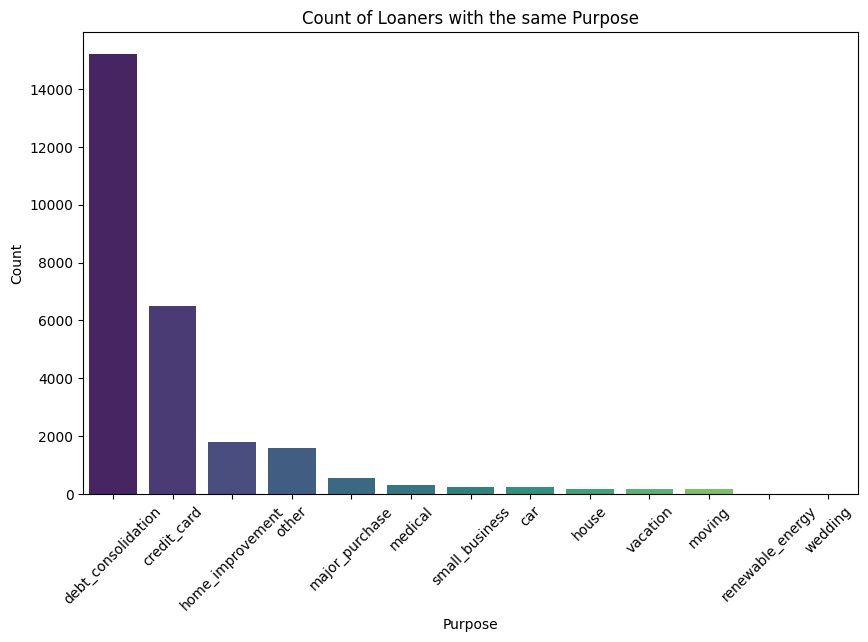

In [109]:
# Assuming your column is named 'Emp_Title'
value_counts = df['Purpose'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

# Title and labels
plt.title('Count of Loaners with the same Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()


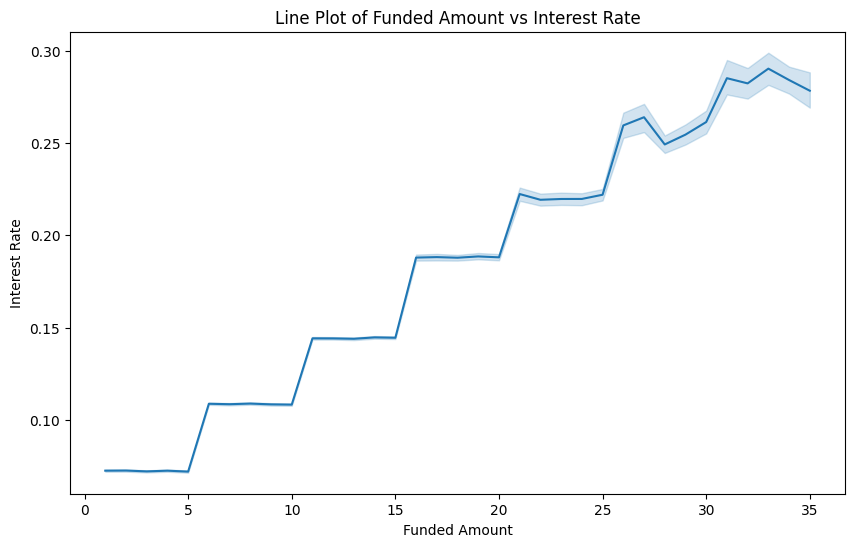

In [110]:

df_sorted = df.sort_values(by='Grade')


# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sorted, x='Grade', y='Int Rate')

# Title and labels
plt.title('Line Plot of Funded Amount vs Interest Rate')
plt.xlabel('Funded Amount')
plt.ylabel('Interest Rate')

# Show the plot
plt.show()

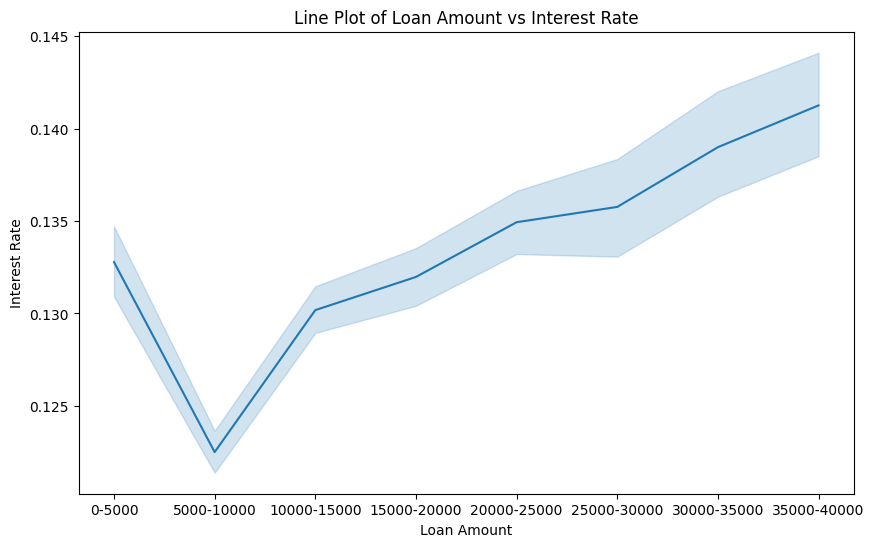

In [111]:
# Assuming your DataFrame is named df
# Define the bins (intervals of 5000)
bins = range(0, int(df['Loan Amount'].max()) + 5000, 5000)

# Define labels for the bins
labels = [f'{i}-{i+5000}' for i in bins[:-1]]

# Use pd.cut to bin the Loan_Amount column
df['Loan_Amount_Binned'] = pd.cut(df['Loan Amount'], bins=bins, labels=labels, right=False)
# Sort the dataframe by Loan Amount
df_sorted = df.sort_values(by='Loan_Amount_Binned')
df = df.drop('Loan_Amount_Binned', axis =1)

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sorted, x='Loan_Amount_Binned', y='Int Rate')

# Title and labels
plt.title('Line Plot of Loan Amount vs Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')

# Show the plot
plt.show()

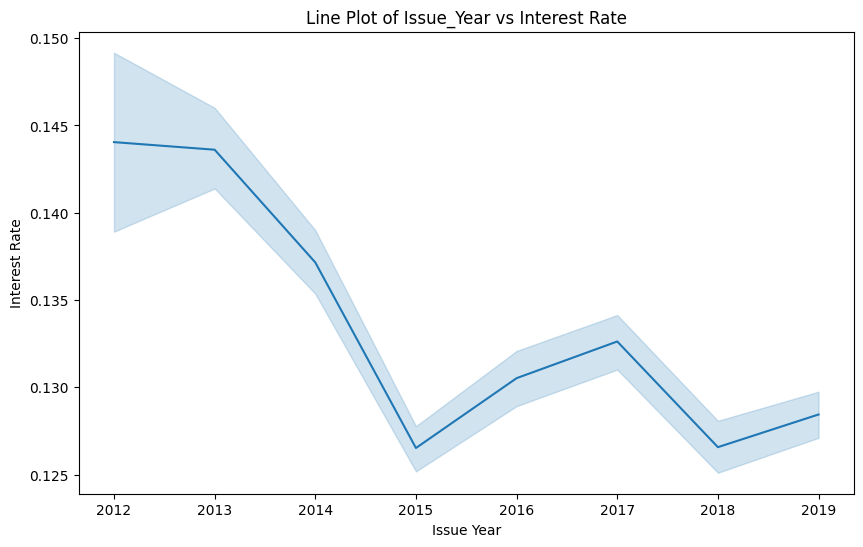

In [112]:
# Assuming your DataFrame is called df
df['Issue Year'] = pd.to_datetime(df['Issue Date'])  # Ensure Issue_Date is in datetime format
df['Issue Year'] = df['Issue Year'].dt.year  # Extract the year from the Issue_Date column


# Sort the dataframe by Loan Amount
df_sorted = df.sort_values(by='Issue Year')

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sorted, x='Issue Year', y='Int Rate')

# Title and labels
plt.title('Line Plot of Issue_Year vs Interest Rate')
plt.xlabel('Issue Year')
plt.ylabel('Interest Rate')

# Show the plot
plt.show()

In [113]:
# Check for missing data in each column
missing_data = df.isnull().sum()

# Print the result
print(missing_data)

# Optional: If you want to view it as a percentage of total rows
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]
print(missing_percentage)

Customer Id                0
Emp Title               2320
Emp Length              1809
Home Ownership             0
Annual Inc                 0
Annual Inc Joint       25136
Verification Status        0
Zip Code                   0
Addr State                 0
Avg Cur Bal                0
Tot Cur Bal                0
Loan Id                    0
Loan Status                0
Loan Amount                0
State                      0
Funded Amount              0
Term                       0
Int Rate                1193
Grade                      0
Issue Date                 0
Pymnt Plan                 0
Type                       0
Purpose                    0
Description              256
Issue Year                 0
dtype: int64
Emp Title            8.583056
Emp Length           6.692564
Annual Inc Joint    92.992971
Int Rate             4.413615
Description          0.947096
dtype: float64


In [114]:
def calculate_missing_overlap_percentage(df, column1, column2):
    """
    Calculates the percentage of overlap of missing values between two columns
    relative to the missing values in each column.

    Parameters:
    df (pd.DataFrame): The DataFrame to check.
    column1 (str): The first column to check for missing values.
    column2 (str): The second column to check for missing values.

    Returns:
    dict: A dictionary with percentages of overlap for each column.
    """
    if column1 in df.columns and column2 in df.columns:
        # Rows with missing values in each column
        missing_col1 = df[column1].isnull()
        missing_col2 = df[column2].isnull()

        # Rows with missing values in both columns
        overlap = missing_col1 & missing_col2

        # Calculate percentages
        overlap_percentage_col1 = (overlap.sum() / missing_col1.sum()) * 100 if missing_col1.sum() > 0 else 0
        overlap_percentage_col2 = (overlap.sum() / missing_col2.sum()) * 100 if missing_col2.sum() > 0 else 0

        # Display the results
        result = {
            f"Percentage of missing values in '{column1}' that overlap with '{column2}'": overlap_percentage_col1,
            f"Percentage of missing values in '{column2}' that overlap with '{column1}'": overlap_percentage_col2,
        }
        return result
    else:
        missing_columns = [col for col in [column1, column2] if col not in df.columns]
        print(f"Column(s) {', '.join(missing_columns)} do not exist in the DataFrame.")
        return {}

In [115]:
calculate_missing_overlap_percentage(df, "Emp Title","Emp Length" )

{"Percentage of missing values in 'Emp Title' that overlap with 'Emp Length'": 77.67241379310344,
 "Percentage of missing values in 'Emp Length' that overlap with 'Emp Title'": 99.6130458817026}

In [116]:
#Annual_Inc_Joint is MCAR
#Emp_Length is MAR depends on the Emp_Title

In [117]:
df_original = df.copy()

In [118]:
def impute_with_regression(df, target_column, predictor_column):
    """
    Impute missing values in the target column using linear regression with the predictor column.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data
    target_column (str): Name of the column with missing values to impute
    predictor_column (str): Name of the column to use as a predictor

    Returns:
    pd.DataFrame: DataFrame with the target column's missing values imputed
    """
    # Separate data into rows with and without missing target_column
    df_missing = df[df[target_column].isnull()]
    df_not_missing = df[df[target_column].notnull()]

    # Prepare features (X) and target (y) for regression
    X_train = df_not_missing[[predictor_column]]
    y_train = df_not_missing[target_column]

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict missing target_column values
    X_missing = df_missing[[predictor_column]]
    predicted_values = model.predict(X_missing)

    # Impute missing values
    df.loc[df[target_column].isnull(), target_column] = predicted_values

    return df

In [119]:
def impute_emp_title(df):
  df['Emp_Title'] = df['Emp_Title'].fillna('unknown')
def impute_int_rate(df):
  df = impute_with_regression(df, target_column='Int_Rate', predictor_column='Grade')
def impute_Emp_Length(df):
  df['Emp_Length'] = df['Emp_Length'].fillna('unknown')
def impute_Description(df):
  df['Description'] = df['Description'].fillna('unknown')
def impute_Annual_Inc_Joint(df):
  df['Annual_Inc_Joint'] = df['Annual_Inc_Joint'].fillna(df['Annual_Inc'])


In [120]:
def impute_missing(df):
  df.columns = df.columns.str.replace(' ', '_')
  df.set_index(['Customer_Id'], inplace=True)
  impute_emp_title(df)
  impute_int_rate(df)
  impute_Emp_Length(df)
  impute_Description(df)
  impute_Annual_Inc_Joint(df)

In [121]:
impute_missing(df)
missing_data = df.isnull().sum()

# Print the result
print(missing_data)

Emp_Title              0
Emp_Length             0
Home_Ownership         0
Annual_Inc             0
Annual_Inc_Joint       0
Verification_Status    0
Zip_Code               0
Addr_State             0
Avg_Cur_Bal            0
Tot_Cur_Bal            0
Loan_Id                0
Loan_Status            0
Loan_Amount            0
State                  0
Funded_Amount          0
Term                   0
Int_Rate               0
Grade                  0
Issue_Date             0
Pymnt_Plan             0
Type                   0
Purpose                0
Description            0
Issue_Year             0
dtype: int64


In [122]:
def plot_column_distribution(df, column):
    if column not in df.columns:
        print(f"Column '{column}' does not exist in the DataFrame.")
        return

    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30, color='blue')  # Histogram with KDE (Kernel Density Estimation)
    plt.title(f"Distribution of {column}", fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [123]:
def outliers_with_IQR(df, column):

    if column not in df.columns:
        print(f"Column '{column}' does not exist in the DataFrame.")


    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_mask = (df[column] < lower_limit) | (df[column] > upper_limit)

    print(f"Column: {column}")
    print(f"Lower Limit: {lower_limit}")
    print(f"Upper Limit: {upper_limit}")
    print(f"Number of Outliers: {outliers_mask.sum()}")
    print(f"Percentage of Outliers: {outliers_mask.sum() / len(df) * 100:.2f}%")





In [124]:
def percentage_outliers_z_score_df(df, column, threshold=3):

    mean = df[column].mean()
    std_dev = df[column].std()
    z_scores = (df[column] - mean) / std_dev
    outliers = z_scores.abs() > threshold
    percentage_outliers = (outliers.sum() / len(df[column])) * 100
    print(f"Percentage of outliers: {percentage_outliers:.2f}%")





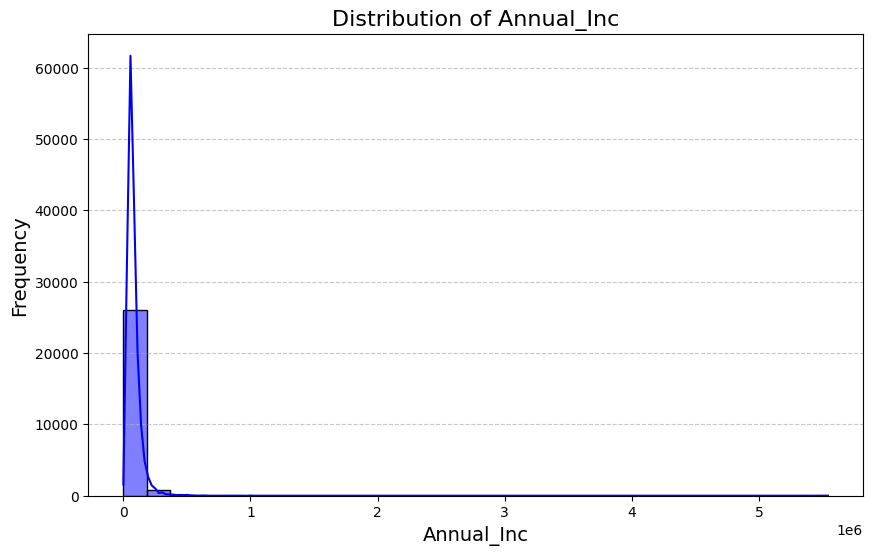

In [125]:
plot_column_distribution(df, 'Annual_Inc')

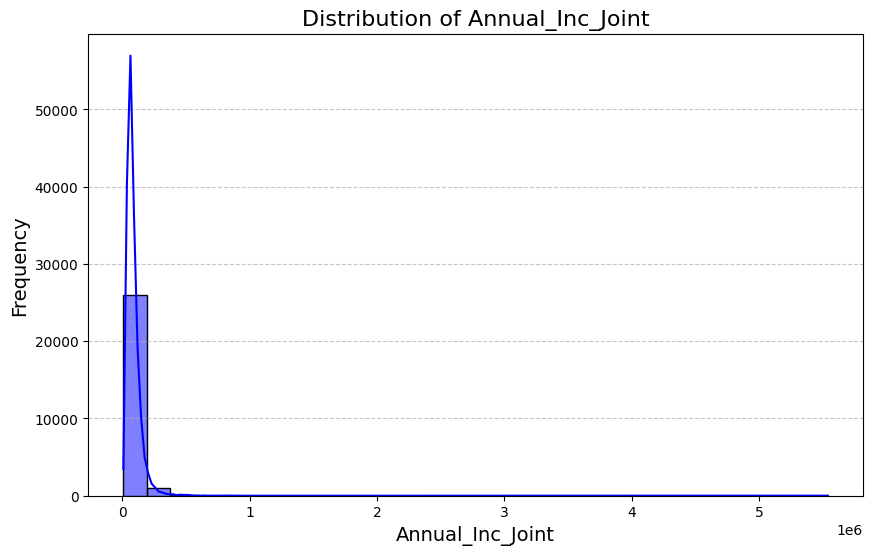

In [126]:
plot_column_distribution(df, 'Annual_Inc_Joint')

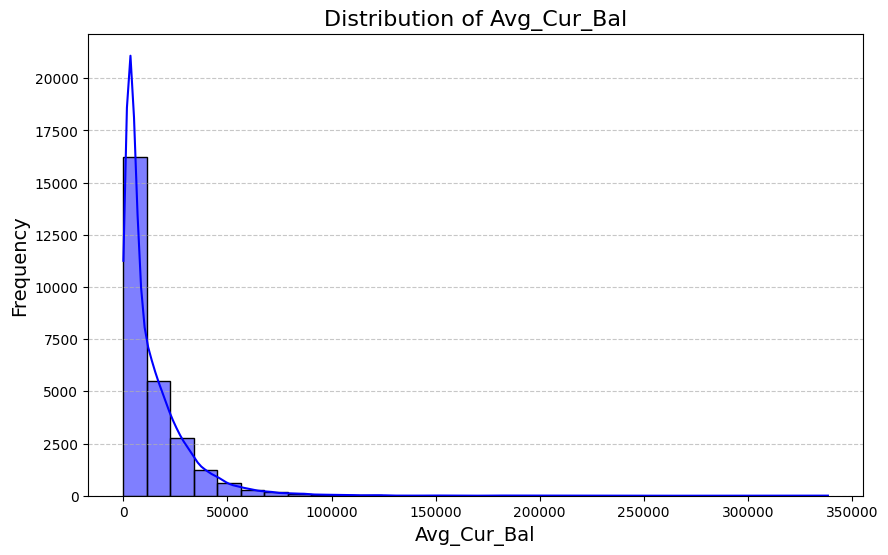

In [127]:
plot_column_distribution(df, 'Avg_Cur_Bal')

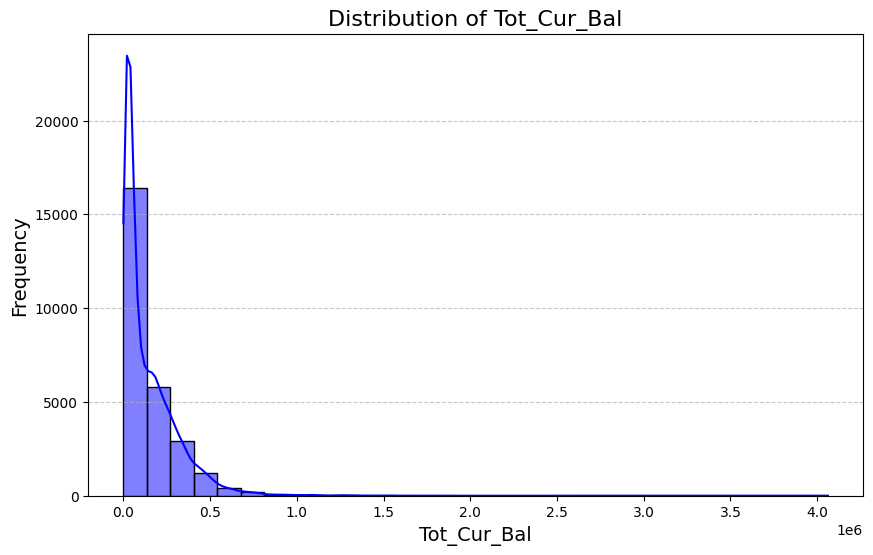

In [128]:
plot_column_distribution(df, 'Tot_Cur_Bal')

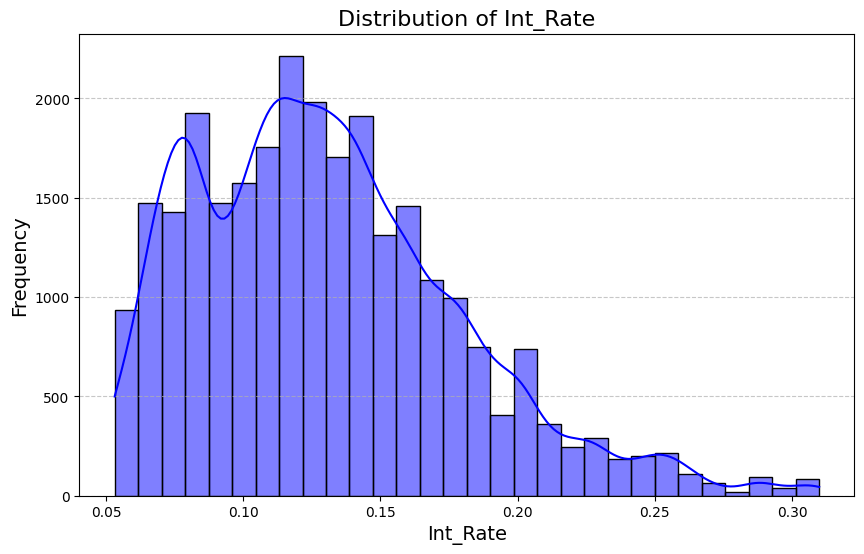

In [129]:
plot_column_distribution(df, 'Int_Rate')

In [130]:
def handle_outliers(df):
  df[ 'Annual_Inc'] = np.log1p(df['Annual_Inc'])
  df[ 'Annual_Inc_Joint'] = np.log1p(df['Annual_Inc_Joint'])
  df[ 'Avg_Cur_Bal'] = np.log1p(df['Avg_Cur_Bal'])
  df[ 'Tot_Cur_Bal'] = np.log1p(df['Tot_Cur_Bal'])
  df[ 'Int_Rate'] = np.log1p(df['Int_Rate'])


In [131]:
handle_outliers(df)

In [132]:
outliers_with_IQR(df, 'Annual_Inc')

Column: Annual_Inc
Lower Limit: 9.73883330971345
Upper Limit: 12.495328329120838
Number of Outliers: 562
Percentage of Outliers: 2.08%


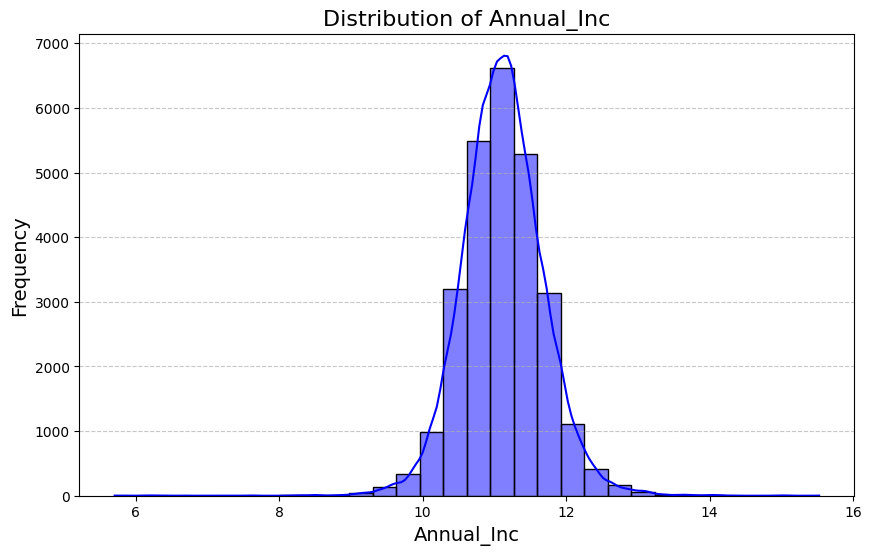

In [133]:
plot_column_distribution(df, 'Annual_Inc')

In [134]:
outliers_with_IQR(df, 'Annual_Inc_Joint')

Column: Annual_Inc_Joint
Lower Limit: 9.780092513145371
Upper Limit: 12.552641235985144
Number of Outliers: 495
Percentage of Outliers: 1.83%


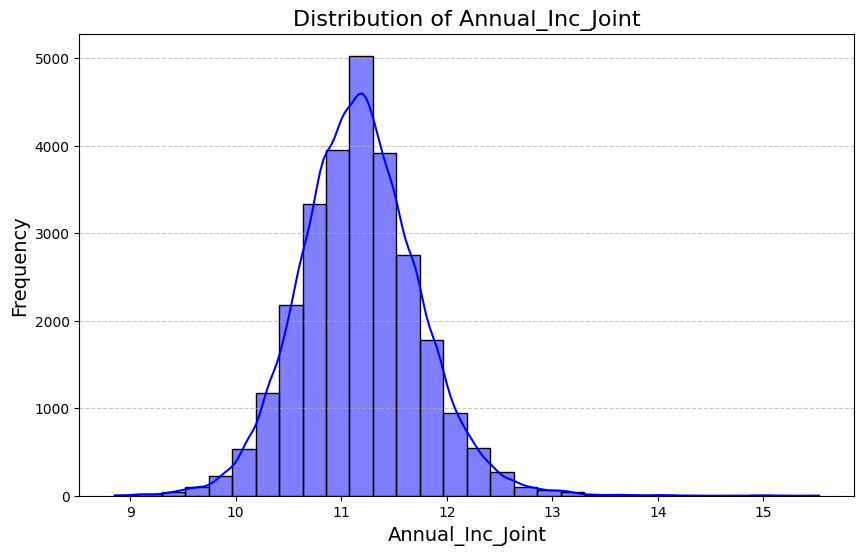

In [135]:
plot_column_distribution(df, 'Annual_Inc_Joint')

In [136]:
outliers_with_IQR(df, 'Avg_Cur_Bal')

Column: Avg_Cur_Bal
Lower Limit: 5.373841368842492
Upper Limit: 12.530148825588888
Number of Outliers: 85
Percentage of Outliers: 0.31%


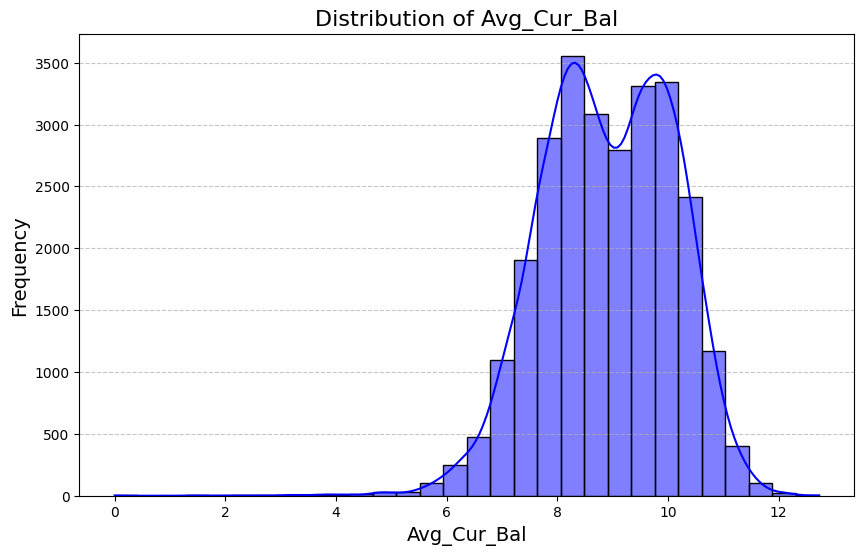

In [137]:
plot_column_distribution(df, 'Avg_Cur_Bal')

In [138]:
outliers_with_IQR(df, 'Tot_Cur_Bal')

Column: Tot_Cur_Bal
Lower Limit: 7.325095968586102
Upper Limit: 15.265194004088425
Number of Outliers: 126
Percentage of Outliers: 0.47%


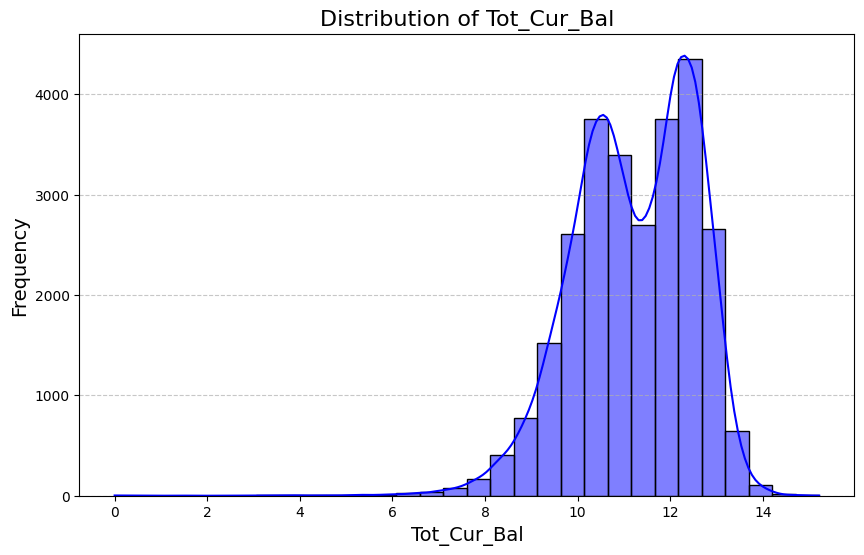

In [139]:
plot_column_distribution(df, 'Tot_Cur_Bal')

In [140]:
outliers_with_IQR(df, 'Loan_Amount')

Column: Loan_Amount
Lower Limit: -11425.0
Upper Limit: 40375.0
Number of Outliers: 0
Percentage of Outliers: 0.00%


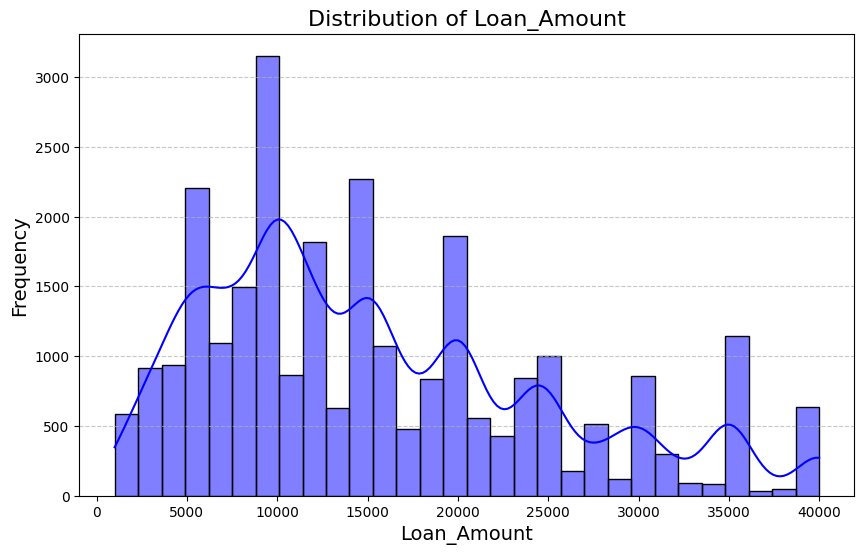

In [141]:
plot_column_distribution(df, 'Loan_Amount')

In [142]:
outliers_with_IQR(df, 'Int_Rate')

Column: Int_Rate
Lower Limit: 0.00278653184711046
Upper Limit: 0.2356621521008433
Number of Outliers: 303
Percentage of Outliers: 1.12%


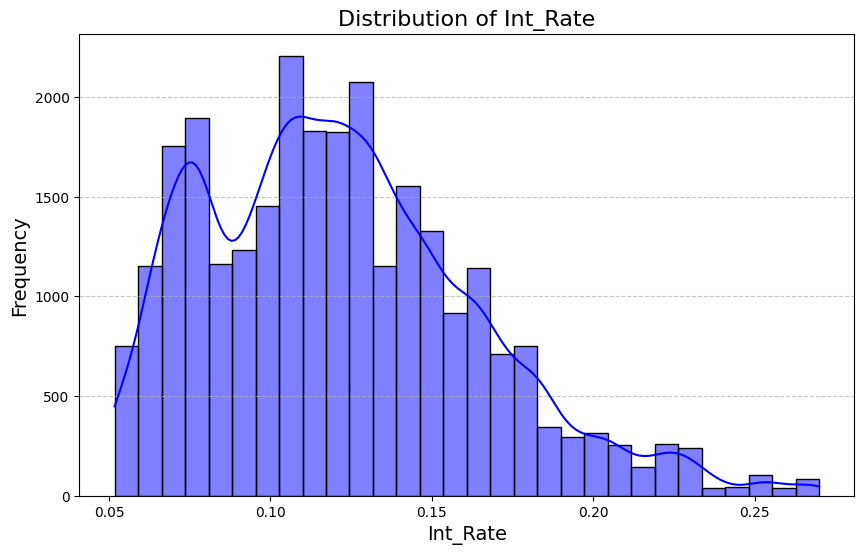

In [143]:
plot_column_distribution(df, 'Int_Rate')

In [144]:
def map_to_letter_grade(grade):
    if 1 <= grade <= 5:
        return 'A'
    elif 6 <= grade <= 10:
        return 'B'
    elif 11 <= grade <= 15:
        return 'C'
    elif 16 <= grade <= 20:
        return 'D'
    elif 21 <= grade <= 25:
        return 'E'
    elif 26 <= grade <= 30:
        return 'F'
    elif 31 <= grade <= 35:
        return 'G'
    else:
        return 'Unknown'

In [145]:
def extract_term(term):
    """
    Extract numerical value from term string (e.g., '30 months' -> 30).
    """
    return int(term.split()[0])


def calculate_monthly_installment(P, r, n):
    """
    Calculate monthly installment.
    P: Loan amount (principal)
    r: Annual interest rate (percentage)
    n: Number of payments (loan term in months)
    """
    # Convert annual interest rate to monthly rate
    r_monthly = r / 12
    # Check if r_monthly is zero (to avoid division by zero)
    if r_monthly == 0:
        return P / n  # Simple division if interest rate is zero
    # Monthly installment formula
    M = P * (r_monthly * (1 + r_monthly) ** n) / ((1 + r_monthly) ** n - 1)
    return M



In [146]:
def feature_engineering(df):
  df['Issue_Date'] = pd.to_datetime(df['Issue_Date'])
  # Create 'Month_Number' column
  df['Month_Number'] = df['Issue_Date'].dt.month
  df['Term_Months'] = df['Term'].apply(extract_term)
  df['Salary_Can_Cover'] = (df['Annual_Inc'] >= df['Loan_Amount']).astype(int)
  df['Letter_Grade'] = df['Grade'].apply(map_to_letter_grade)
  df['Installment_per_Month'] = df.apply(
    lambda row: calculate_monthly_installment(row['Loan_Amount'], row['Int_Rate'], row['Term_Months']),
    axis=1)

In [147]:
feature_engineering(df)

In [148]:
df.head()

,Emp_Title,Emp_Length,Home_Ownership,Annual_Inc,Annual_Inc_Joint,Verification_Status,Zip_Code,Addr_State,Avg_Cur_Bal,Tot_Cur_Bal,Loan_Id,Loan_Status,Loan_Amount,State,Funded_Amount,Term,Int_Rate,Grade,Issue_Date,Pymnt_Plan,Type,Purpose,Description,Issue_Year,Month_Number,Term_Months,Salary_Can_Cover,Letter_Grade,Installment_per_Month
Customer_Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Yid6XHg5Y1x4YWRceDhkXHgwZVx4ZDhceGFlXHg5Y1x4OWNceGZib1gtRi5ceDg1XHhjNTtkM1x4YTNGXHg5Mlx4YjdceGIzXHgxZVx4MDFceDliXHhiNlx4ZGZkXFwn,Store Manager,2 years,MORTGAGE,11.258046,11.258046,Source Verified,550xx,MN,10.833563,12.779448,146317,Current,15000.0,MN,15000.0,36 months,0.064570,2,2018-10-18,False,INDIVIDUAL,debt_consolidation,Debt consolidation,2018,10,36,0,A,459.441366
Yid9XHg4Ylx4ODdceGZlUVx4MWFcXFx4ZjZceDg0XHhhNlx4YzdmXHJcblx4YjFceGNmXHhjMVx4ODhcclx4ODZceGJkblx4ZWRcblx4ZTdceGE3XHhkNFx4MDR7XHhiYX1IJw==,Mortgage Loan Officer,5 years,MORTGAGE,11.561725,11.561725,Source Verified,481xx,MI,10.388133,12.585331,218466,Fully Paid,24000.0,MI,24000.0,60 months,0.122129,12,2016-02-16,False,INDIVIDUAL,debt_consolidation,Debt consolidation,2016,2,60,0,C,536.452544
YidceDBmXHhiY05ceGY4V1x4OTBceDgxXHhlOFx4ODBceDFmXHhhNFx4OWI3XHgxOVx4YjhceGU1XHg4NFx4OTdNR1x4YmVUalx4ZTdceGU3XHhjMDtceGZlRlx4ODlceDhkRCc=,Supervisor,2 years,MORTGAGE,11.258046,11.258046,Verified,447xx,OH,9.349667,12.122213,240070,Charged Off,30000.0,OH,30000.0,60 months,0.198769,29,2015-07-15,False,INDIVIDUAL,debt_consolidation,Debt consolidation,2015,7,60,0,F,792.762880
YidceGI3XHhlMFx4MWU1XHhhZVx4YjVceGE0WVx4ZjJceDE0XHg4ZVx4OWY0XHhiODI2XHgxOURceGRjXHgwMFx4OTAqXHhlZUhceDlmXHhkM2pceGEwcFhceGFjZSc=,Teacher,10+ years,MORTGAGE,10.985310,10.985310,Not Verified,752xx,TX,8.778172,11.822614,53658,Fully Paid,7000.0,TX,7000.0,36 months,0.104381,8,2015-07-15,False,INDIVIDUAL,debt_consolidation,Debt consolidation,2015,7,36,0,B,227.312986
Yidxb3l1XHhlMUZceGQ2XHg4YVx4YWJceDE0XHhkNlx4ZWRceGZlXHhhMTpceDljXHhlMVx4MTcuXHg4Nk1ceDg1P0VceGExXHhkNFx4OGJceDE5MFx4YzlceGQ5XHgxMic=,Electronics Repair Technician,4 years,RENT,11.350418,11.350418,Source Verified,551xx,MN,8.708144,10.499793,15383,Current,3600.0,MN,3600.0,36 months,0.107867,10,2016-12-16,False,INDIVIDUAL,major_purchase,Major purchase,2016,12,36,0,B,117.496138


In [149]:
df.describe()

,Annual_Inc,Annual_Inc_Joint,Avg_Cur_Bal,Tot_Cur_Bal,Loan_Id,Loan_Amount,Funded_Amount,Int_Rate,Grade,Issue_Date,Issue_Year,Month_Number,Term_Months,Salary_Can_Cover,Installment_per_Month
count,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030,27030.000000,27030.000000,27030.000000,27030.0,27030.000000
mean,11.117670,11.173182,8.909917,11.219995,135752.951239,15502.262301,15502.262301,0.121838,10.896559,2017-02-03 16:32:33.029966592,2016.578653,6.689308,43.085461,0.0,449.746174
min,5.707110,8.853808,0.000000,0.000000,12.000000,1000.000000,1000.000000,0.051738,1.000000,2012-08-12 00:00:00,2012.000000,1.000000,36.000000,0.0,30.053271
25%,10.772519,10.819798,8.057457,10.302633,68406.250000,8000.000000,8000.000000,0.090115,6.000000,2015-09-15 00:00:00,2015.000000,4.000000,36.000000,0.0,255.715921
50%,11.104972,11.156265,8.921458,11.302365,135498.000000,13200.000000,13200.000000,0.118138,10.000000,2017-03-17 00:00:00,2017.000000,7.000000,36.000000,0.0,379.414571
75%,11.461643,11.512935,9.846534,12.287657,203850.500000,20950.000000,20950.000000,0.148334,15.000000,2018-09-18 00:00:00,2018.000000,10.000000,60.000000,0.0,599.760890
max,15.527707,15.527707,12.732347,15.217250,270296.000000,40000.000000,40000.000000,0.269951,35.000000,2019-12-19 00:00:00,2019.000000,12.000000,60.000000,0.0,1534.130815
std,0.567694,0.561309,1.189969,1.304182,78083.060485,9510.145207,9510.145207,0.042376,6.322551,NaN,1.843464,3.413594,10.947682,0.0,269.447167


In [150]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['normalized_Loan_Amount'] = scaler.fit_transform(df[['Loan_Amount']])
df['normalized_Funded_Amount'] = scaler.fit_transform(df[['Funded_Amount']])


In [151]:
df.describe()

,Annual_Inc,Annual_Inc_Joint,Avg_Cur_Bal,Tot_Cur_Bal,Loan_Id,Loan_Amount,Funded_Amount,Int_Rate,Grade,Issue_Date,Issue_Year,Month_Number,Term_Months,Salary_Can_Cover,Installment_per_Month,normalized_Loan_Amount,normalized_Funded_Amount
count,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030,27030.000000,27030.000000,27030.000000,27030.0,27030.000000,27030.000000,27030.000000
mean,11.117670,11.173182,8.909917,11.219995,135752.951239,15502.262301,15502.262301,0.121838,10.896559,2017-02-03 16:32:33.029966592,2016.578653,6.689308,43.085461,0.0,449.746174,0.371853,0.371853
min,5.707110,8.853808,0.000000,0.000000,12.000000,1000.000000,1000.000000,0.051738,1.000000,2012-08-12 00:00:00,2012.000000,1.000000,36.000000,0.0,30.053271,0.000000,0.000000
25%,10.772519,10.819798,8.057457,10.302633,68406.250000,8000.000000,8000.000000,0.090115,6.000000,2015-09-15 00:00:00,2015.000000,4.000000,36.000000,0.0,255.715921,0.179487,0.179487
50%,11.104972,11.156265,8.921458,11.302365,135498.000000,13200.000000,13200.000000,0.118138,10.000000,2017-03-17 00:00:00,2017.000000,7.000000,36.000000,0.0,379.414571,0.312821,0.312821
75%,11.461643,11.512935,9.846534,12.287657,203850.500000,20950.000000,20950.000000,0.148334,15.000000,2018-09-18 00:00:00,2018.000000,10.000000,60.000000,0.0,599.760890,0.511538,0.511538
max,15.527707,15.527707,12.732347,15.217250,270296.000000,40000.000000,40000.000000,0.269951,35.000000,2019-12-19 00:00:00,2019.000000,12.000000,60.000000,0.0,1534.130815,1.000000,1.000000
std,0.567694,0.561309,1.189969,1.304182,78083.060485,9510.145207,9510.145207,0.042376,6.322551,NaN,1.843464,3.413594,10.947682,0.0,269.447167,0.243850,0.243850


In [152]:
# Count occurrences of each unique value
state_counts = df['Addr_State'].value_counts()

# Check if all counts are the same
all_equal = state_counts.nunique() == 1

if all_equal:
    print("All unique values in 'Addr_State' have the same count.")
else:
    print("The unique values in 'Addr_State' do not have the same count.")


The unique values in 'Addr_State' do not have the same count.


In [153]:
(df['Addr_State'] == df['State']).all()

True

In [154]:
def encoding(df):
  df = pd.get_dummies(df, columns=['Home_Ownership'])  # Avoid multicollinearity
  encoded_columns = [col for col in df.columns if col.startswith('Home_Ownership')]
  df[encoded_columns] = df[encoded_columns].astype(int)
  df = pd.get_dummies(df, columns=['Verification_Status'])  # Avoid multicollinearity
  encoded_columns = [col for col in df.columns if col.startswith('Verification_Status')]
  df[encoded_columns] = df[encoded_columns].astype(int)
  df = pd.get_dummies(df, columns=['Loan_Status'])  # Avoid multicollinearity
  encoded_columns = [col for col in df.columns if col.startswith('Loan_Status')]
  df[encoded_columns] = df[encoded_columns].astype(int)
  df = pd.get_dummies(df, columns=['Type'])  # Avoid multicollinearity
  encoded_columns = [col for col in df.columns if col.startswith('Type')]
  df[encoded_columns] = df[encoded_columns].astype(int)
  df = pd.get_dummies(df, columns=['Purpose'])  # Avoid multicollinearity
  encoded_columns = [col for col in df.columns if col.startswith('Purpose')]
  df[encoded_columns] = df[encoded_columns].astype(int)
  frequency_encoding = df['Addr_State'].value_counts()
  df['Addr_State_encoded'] = df['Addr_State'].map(frequency_encoding)
  frequency_encoding = df['State'].value_counts()
  df['State_encoded'] = df['State'].map(frequency_encoding)
  df['term_encoded_by_12'] = (df['Term'].str.extract('(\d+)', expand=False).astype(int))/12
  label_encoder = LabelEncoder()
  df['letter_grade_encoded'] = label_encoder.fit_transform(df['Letter_Grade'])
  return df




In [155]:
df = encoding(df)

In [156]:
df.head()

,Emp_Title,Emp_Length,Annual_Inc,Annual_Inc_Joint,Zip_Code,Addr_State,Avg_Cur_Bal,Tot_Cur_Bal,Loan_Id,Loan_Amount,State,Funded_Amount,Term,Int_Rate,Grade,Issue_Date,Pymnt_Plan,Description,Issue_Year,Month_Number,Term_Months,Salary_Can_Cover,Letter_Grade,Installment_per_Month,normalized_Loan_Amount,normalized_Funded_Amount,Home_Ownership_ANY,Home_Ownership_MORTGAGE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,Verification_Status_Not Verified,Verification_Status_Source Verified,Verification_Status_Verified,Loan_Status_Charged Off,Loan_Status_Current,Loan_Status_Default,Loan_Status_Fully Paid,Loan_Status_In Grace Period,Loan_Status_Late (16-30 days),Loan_Status_Late (31-120 days),Type_DIRECT_PAY,Type_INDIVIDUAL,Type_JOINT,Type_Joint App,Purpose_car,Purpose_credit_card,Purpose_debt_consolidation,Purpose_home_improvement,Purpose_house,Purpose_major_purchase,Purpose_medical,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Addr_State_encoded,State_encoded,term_encoded_by_12,letter_grade_encoded
Customer_Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Yid6XHg5Y1x4YWRceDhkXHgwZVx4ZDhceGFlXHg5Y1x4OWNceGZib1gtRi5ceDg1XHhjNTtkM1x4YTNGXHg5Mlx4YjdceGIzXHgxZVx4MDFceDliXHhiNlx4ZGZkXFwn,Store Manager,2 years,11.258046,11.258046,550xx,MN,10.833563,12.779448,146317,15000.0,MN,15000.0,36 months,0.064570,2,2018-10-18,False,Debt consolidation,2018,10,36,0,A,459.441366,0.358974,0.358974,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,484,484,3.0,0
Yid9XHg4Ylx4ODdceGZlUVx4MWFcXFx4ZjZceDg0XHhhNlx4YzdmXHJcblx4YjFceGNmXHhjMVx4ODhcclx4ODZceGJkblx4ZWRcblx4ZTdceGE3XHhkNFx4MDR7XHhiYX1IJw==,Mortgage Loan Officer,5 years,11.561725,11.561725,481xx,MI,10.388133,12.585331,218466,24000.0,MI,24000.0,60 months,0.122129,12,2016-02-16,False,Debt consolidation,2016,2,60,0,C,536.452544,0.589744,0.589744,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,679,679,5.0,2
YidceDBmXHhiY05ceGY4V1x4OTBceDgxXHhlOFx4ODBceDFmXHhhNFx4OWI3XHgxOVx4YjhceGU1XHg4NFx4OTdNR1x4YmVUalx4ZTdceGU3XHhjMDtceGZlRlx4ODlceDhkRCc=,Supervisor,2 years,11.258046,11.258046,447xx,OH,9.349667,12.122213,240070,30000.0,OH,30000.0,60 months,0.198769,29,2015-07-15,False,Debt consolidation,2015,7,60,0,F,792.762880,0.743590,0.743590,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,871,871,5.0,5
YidceGI3XHhlMFx4MWU1XHhhZVx4YjVceGE0WVx4ZjJceDE0XHg4ZVx4OWY0XHhiODI2XHgxOURceGRjXHgwMFx4OTAqXHhlZUhceDlmXHhkM2pceGEwcFhceGFjZSc=,Teacher,10+ years,10.985310,10.985310,752xx,TX,8.778172,11.822614,53658,7000.0,TX,7000.0,36 months,0.104381,8,2015-07-15,False,Debt consolidation,2015,7,36,0,B,227.312986,0.153846,0.153846,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2253,2253,3.0,1
Yidxb3l1XHhlMUZceGQ2XHg4YVx4YWJceDE0XHhkNlx4ZWRceGZlXHhhMTpceDljXHhlMVx4MTcuXHg4Nk1ceDg1P0VceGExXHhkNFx4OGJceDE5MFx4YzlceGQ5XHgxMic=,Electronics Repair Technician,4 years,11.350418,11.350418,551xx,MN,8.708144,10.499793,15383,3600.0,MN,3600.0,36 months,0.107867,10,2016-12-16,False,Major purchase,2016,12,36,0,B,117.496138,0.066667,0.066667,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,484,484,3.0,1


In [157]:
# Create an empty DataFrame for the lookup table
lookup_table = pd.DataFrame(columns=['Feature', 'Original Value', 'Encoded/Imputed Value'])

# Record the imputation in the lookup table
lookup_table = pd.concat([
    lookup_table,
    pd.DataFrame({
        'Feature': ['Emp_Title'],
        'Original Value': [np.nan],
        'Encoded/Imputed Value': ['unknown']

    }),pd.DataFrame({
        'Feature': ['Emp_Length'],
        'Original Value': [np.nan],
        'Encoded/Imputed Value': ['unknown']
    })
    ,pd.DataFrame({
        'Feature': ['Description'],
        'Original Value': [np.nan],
        'Encoded/Imputed Value': ['unknown']

    }),pd.DataFrame({
        'Feature': ['Letter_Grade'],
        'Original Value': ['1 <= grade <= 5'],
        'Encoded/Imputed Value': ['0']
    }),pd.DataFrame({
        'Feature': ['Letter_Grade'],
        'Original Value': ['6 <= grade <= 10'],
        'Encoded/Imputed Value': ['1']
    })
    ,pd.DataFrame({
        'Feature': ['Letter_Grade'],
        'Original Value': ['11 <= grade <= 15'],
        'Encoded/Imputed Value': ['2']
    }),pd.DataFrame({
        'Feature': ['Letter_Grade'],
        'Original Value': ['16 <= grade <= 20'],
        'Encoded/Imputed Value': ['3']
    }),pd.DataFrame({
        'Feature': ['Letter_Grade'],
        'Original Value': ['21 <= grade <= 25'],
        'Encoded/Imputed Value': ['4']
    }),pd.DataFrame({
        'Feature': ['Letter_Grade'],
        'Original Value': ['26 <= grade <= 30'],
        'Encoded/Imputed Value': ['5']
    }),pd.DataFrame({
        'Feature': ['Letter_Grade'],
        'Original Value': ['31 <= grade <= 35'],
        'Encoded/Imputed Value': ['6']
    })
])




In [158]:
print(lookup_table)

        Feature     Original Value Encoded/Imputed Value
0     Emp_Title                NaN               unknown
0    Emp_Length                NaN               unknown
0   Description                NaN               unknown
0  Letter_Grade    1 <= grade <= 5                     0
0  Letter_Grade   6 <= grade <= 10                     1
0  Letter_Grade  11 <= grade <= 15                     2
0  Letter_Grade  16 <= grade <= 20                     3
0  Letter_Grade  21 <= grade <= 25                     4
0  Letter_Grade  26 <= grade <= 30                     5
0  Letter_Grade  31 <= grade <= 35                     6


In [159]:
output_file = "df.csv"
df.to_csv(output_file, index=False)